Import All the dependencies.

In [ ]:
#@title Default title text
import tensorflow as tf
import os


In [ ]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The bottom lines are about the GPU and on how to limit the GPU usage.

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

print(gpus) #this gives a list of gpus that we have in the system.(CPU as well)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
#To avoid out of memory error(oom error) by the gpu:|
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:  #We are restricitng the memoty growth of all the gpus availabe with us.
  tf.config.experimental.set_memory_growth(gpu,True)

To remove improper images.

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Data'

In [ ]:
os.listdir(data_dir) #It will list everything inside the data direc.

['sad', 'happy']

In [ ]:
img_ext = ['jpeg','png','bmp','jpg'] #standard image extensions.
os.listdir(os.path.join(data_dir,'happy'))

['image30.jpeg',
 'images31.jpg',
 'images56.jpg',
 'image.jpeg',
 'image2 (1).jpeg',
 'images37.jpg',
 'images23.jpg',
 'image32.png',
 'images135.jpg',
 'images16.jpg',
 'images76.jpg',
 'images60 (1).jpg',
 'images46.jpg',
 'image26.jpeg',
 'images127.jpg',
 'images20.jpg',
 'images25.jpg',
 'images138.jpg',
 'images18.jpg',
 'happyball-3.jpg',
 'images98.jpg',
 'images141.jpg',
 'images118.jpg',
 'image8.jpeg',
 'images14.jpg',
 'images122.jpg',
 'images116.jpg',
 'images33.jpg',
 'images24.jpg',
 'images72.jpg',
 'images133.jpg',
 'images128.jpg',
 'images113.jpg',
 '1920px-face-smile.svg_.png.jpg',
 'images90.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'images119.jpg',
 'images110.jpg',
 'images40.jpg',
 'images126.jpg',
 'images107.jpg',
 'image11 (1).jpeg',
 'image11.jpeg',
 'images55.jpg',
 'images132.jpg',
 'images57.jpg',
 'images61.jpg',
 'images29.jpg',
 'image10.jpeg',
 'images79.jpg',
 'images84.jpg',
 'image4.jpeg',
 'images139.jpg',
 'images11.jpg',
 'image20.jpeg',

In [ ]:
image_path = os.path.join(data_dir,'happy','happy_imahe.jpg')
img = cv2.imread(image_path)
print(img)

[[[134 103 178]
  [133 102 177]
  [134 103 178]
  ...
  [127 160 233]
  [127 160 233]
  [128 161 234]]

 [[136 105 180]
  [135 104 179]
  [135 104 179]
  ...
  [126 159 232]
  [126 159 232]
  [125 158 231]]

 [[137 106 181]
  [137 106 181]
  [136 105 180]
  ...
  [124 159 232]
  [122 157 230]
  [121 156 229]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [ ]:
for i in os.listdir(data_dir): #iterating through the Data directory.
  for image in os.listdir(os.path.join(data_dir,i)): #iterating through every image class.
    image_path = os.path.join(data_dir,i,image)
    try:
      img = cv2.imread(image_path) #this will read the image using opencv -> numpy array.(pixels)
      tip = imghdr.what(image_path)
      if tip not in img_ext: #checking for images that are not of proper extension.
        print('Image not in extensions list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))




Load Data


In [ ]:
tf.data.Dataset #This is a data set api.

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

This line basically created a nice dataset which can be used to train the model.

The function takes as input the path to a directory containing the images, and returns a tf.data.Dataset object that can be used to train a deep learning model. Specifically, the function creates a dataset where each element is a tuple containing an image tensor and its corresponding label.

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data') #The function reads the image files from the directory, and creates a dataset that can be used for training or evaluation of a machine learning model.

Found 543 files belonging to 2 classes.


In [ ]:
data_iter = data.as_numpy_iterator() #this created a iterator to iterate over the dataset created.
print(data_iter)

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7b13919da770>)


In [ ]:
batch = data_iter.next()
print(batch)

(array([[[[1.88000000e+02, 1.88000000e+02, 1.88000000e+02],
         [1.88000000e+02, 1.88000000e+02, 1.88000000e+02],
         [1.88000000e+02, 1.88000000e+02, 1.88000000e+02],
         ...,
         [1.91000000e+02, 1.91000000e+02, 1.91000000e+02],
         [1.91000000e+02, 1.91000000e+02, 1.91000000e+02],
         [1.91000000e+02, 1.91000000e+02, 1.91000000e+02]],

        [[1.88085938e+02, 1.88085938e+02, 1.88085938e+02],
         [1.88085938e+02, 1.88085938e+02, 1.88085938e+02],
         [1.88085938e+02, 1.88085938e+02, 1.88085938e+02],
         ...,
         [1.91085938e+02, 1.91085938e+02, 1.91085938e+02],
         [1.91085938e+02, 1.91085938e+02, 1.91085938e+02],
         [1.91085938e+02, 1.91085938e+02, 1.91085938e+02]],

        [[1.88476562e+02, 1.88476562e+02, 1.88476562e+02],
         [1.88476562e+02, 1.88476562e+02, 1.88476562e+02],
         [1.88476562e+02, 1.88476562e+02, 1.88476562e+02],
         ...,
         [1.91476562e+02, 1.91476562e+02, 1.91476562e+02],
         

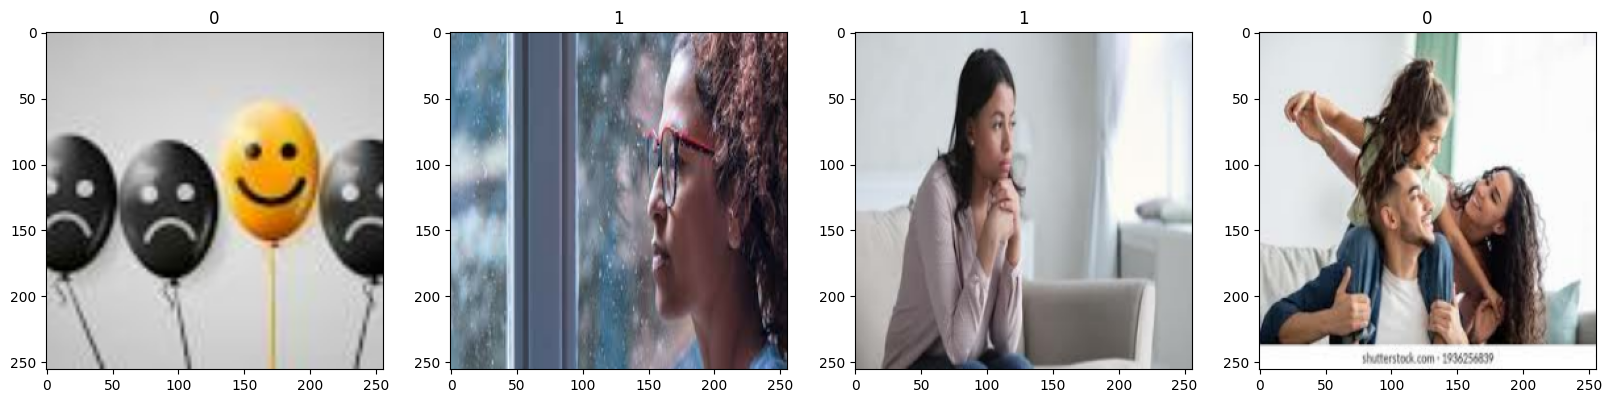

In [ ]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20)) #plotting whatever we got in one batch.
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
# 0 means happy and 1 means sad.

Scaling the data -> Reducing the size of the image instead of having it between 0 and 250.

In [ ]:
data = data.map(lambda x,y: (x/255,y)) #scaling the img sizes between 0 and 1. Basically like a hash function.

In [ ]:
scaled_iter = data.as_numpy_iterator()

In [ ]:
batch = scaled_iter.next()
batch[0].max()

1.0

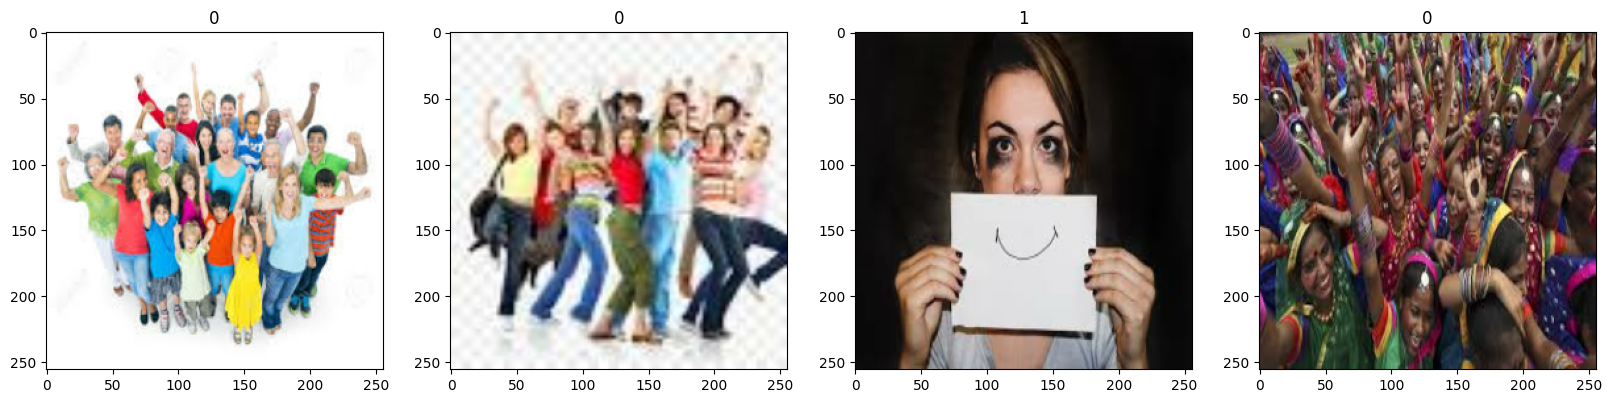

In [ ]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20)) #plotting whatever we got in one batch.
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Splitting the data into training and testing data.
This is done so as to ensure we haven't overfitted our model.

In [ ]:
train_size = int(len(data)* 0.7) #70% of the data is for training.
test_size = int(len(data) * 0.2) + 1 # 20% of the data is for testing. -> this will never be seen by the model until we train it.
val_size = int(len(data) * 0.1) + 1 # 10% of the data is for validation.
len(data)

17

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
len(val)


2

Deep Learning Model starts here.

Building our Model:


In [ ]:
from tensorflow.keras.models import Sequential #if we want one data input and one data output.
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout #Conv2D is a 2-D CNN.

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy']) #adam optimizer.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the model.

In [ ]:
logdir = '/content/drive/MyDrive/logs1'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train,epochs = 20,validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 508ms/step - accuracy: 0.4392 - loss: 1.1995 - val_accuracy: 0.6406 - val_loss: 0.6789
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 725ms/step - accuracy: 0.6352 - loss: 0.6727 - val_accuracy: 0.7656 - val_loss: 0.6156
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.7151 - loss: 0.6126 - val_accuracy: 0.7812 - val_loss: 0.5017
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 757ms/step - accuracy: 0.7383 - loss: 0.5610 - val_accuracy: 0.7344 - val_loss: 0.5686
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 530ms/step - accuracy: 0.8487 - loss: 0.5450 - val_accuracy: 0.7969 - val_loss: 0.4522
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 759ms/step - accuracy: 0.8307 - loss: 0.4251 - val_accuracy: 0.9062 - val_loss: 0.2817
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 521ms/step - accuracy: 0.8923 - loss: 0.3047 - val_accuracy: 0.8594 - val_loss: 0.2613
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 514ms/step - accuracy: 0.9187 - loss: 0.2348 - val_accuracy: 

In [ ]:
hist.history

{'accuracy': [0.4829545319080353,
  0.6136363744735718,
  0.6960227489471436,
  0.7017045617103577,
  0.8210227489471436,
  0.8039772510528564,
  0.8835227489471436,
  0.9289772510528564,
  0.9659090638160706,
  0.9801136255264282,
  0.9801136255264282,
  0.9772727489471436,
  0.9971590638160706,
  0.9943181872367859,
  0.9971590638160706,
  0.9886363744735718,
  0.9914772510528564,
  0.9943181872367859,
  0.9971590638160706,
  0.9971590638160706],
 'loss': [0.991309404373169,
  0.6762858033180237,
  0.5928421020507812,
  0.5843674540519714,
  0.5500056743621826,
  0.4228200912475586,
  0.31634485721588135,
  0.21760277450084686,
  0.14063669741153717,
  0.07931976765394211,
  0.04842656850814819,
  0.06562294065952301,
  0.046060964465141296,
  0.02020319551229477,
  0.014304551295936108,
  0.024823931977152824,
  0.014918581582605839,
  0.013955393806099892,
  0.008270368911325932,
  0.011201350949704647],
 'val_accuracy': [0.640625,
  0.765625,
  0.78125,
  0.734375,
  0.796875,
  0

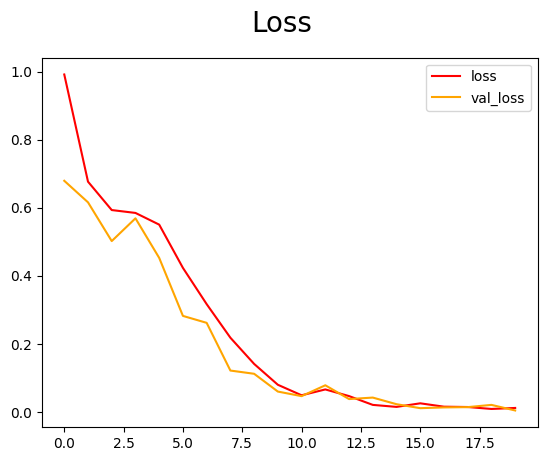

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'red',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

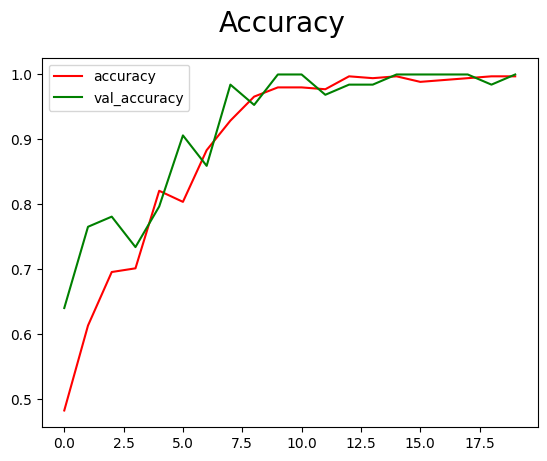

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'red',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'green',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Testing the Model:

In [ ]:

def prediction(p):
  img = cv2.imread(p)
  plt.imshow(img)
  plt.show()
  resize = tf.image.resize(img,(256,256))
  y_hat = model.predict(np.expand_dims(resize/255,0))
  if y_hat >  0.5:
    print('Prediction: Happy')
  else:
    print('Prediction: Sad')

prediction('/content/drive/MyDrive/happyface.jpg')

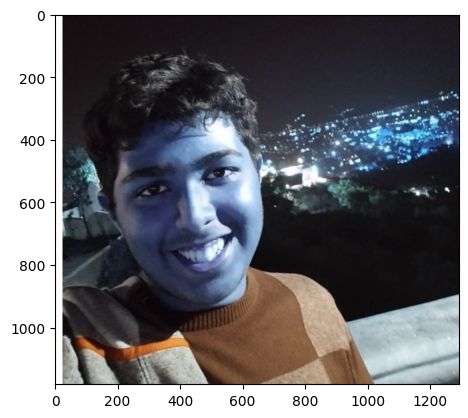

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Happy


In [ ]:
prediction('/content/drive/MyDrive/myface.jpg')

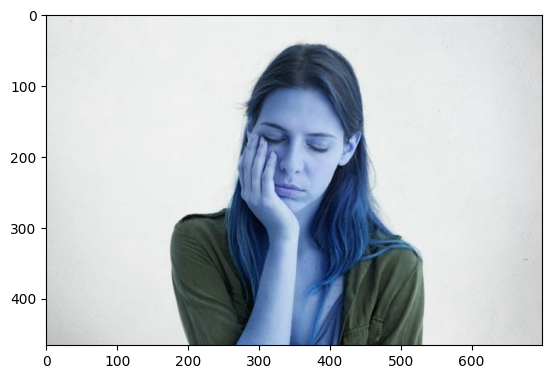

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: Sad


In [ ]:
prediction("/content/drive/MyDrive/sadpplphoto2.jpg")